<a href="https://colab.research.google.com/github/rajasreekalli/Data-Visualization/blob/main/Neural_Network_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector,make_column_transformer
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Read the file

df = pd.read_csv('/content/drive/MyDrive/train1.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Identify the data type

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Identify the null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df.drop(columns='Cabin')

This Cabin column contain more than 50% null values. So i prefer to choose drop the column. So that's the reason i can't use the simple imputer.

In [ ]:
df.dropna(subset=['Embarked'],inplace=True)

In [ ]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [ ]:
# Check for the duplicates

df.duplicated().any()

False

In [ ]:
# Check for Unique values

df['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Identify the feature matrics and target vector

X= df.drop(columns={'Survived','Name'})
y = df['Survived']

In [ ]:
# Train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [ ]:
#X_train = np.asarray(X_train).astype(np.float32)
#y_train = np.asarray(y_train).astype(np.float32)

In [ ]:
# Scale the data

scalar = StandardScaler()
impute = SimpleImputer(strategy='median')

In [ ]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
num_column = make_column_selector(dtype_include='number')
cat_column = make_column_selector(dtype_include='object')
num_pipe = make_pipeline(impute,scalar)
num_tuple = (num_pipe,num_column)
ohe_tuple = (ohe,cat_column)
column_transform = make_column_transformer(num_tuple,ohe_tuple)

In [ ]:
X_trainpro = column_transform.fit_transform(X_train)
X_testpro  = column_transform.transform(X_test)

In [ ]:
# Build your model
# Create your model

n_col = X_trainpro.shape[1]
model = Sequential()
model.add(Dense(10,activation='relu',input_dim = X_trainpro.shape[1]))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
# Fit the model

history = model.fit(X_trainpro,y_train,validation_data=(X_testpro,y_test),epochs=100)

Epoch 1/100
21/21 [==============================] - 1s 10ms/step - loss: 0.6847 - acc: 0.5796 - val_loss: 0.6713 - val_acc: 0.7623
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6654 - acc: 0.7508 - val_loss: 0.6517 - val_acc: 0.7892
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6437 - acc: 0.7688 - val_loss: 0.6278 - val_acc: 0.7848
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6157 - acc: 0.7928 - val_loss: 0.5985 - val_acc: 0.8027
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5818 - acc: 0.8063 - val_loss: 0.5632 - val_acc: 0.7848
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5413 - acc: 0.8198 - val_loss: 0.5263 - val_acc: 0.8117
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4975 - acc: 0.8348 - val_loss: 0.4896 - val_acc: 0.8027
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4529 - 

In [ ]:
# Read the file

data = pd.read_csv('/content/test1.csv')
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Checking for the data types

data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Checking for null values

data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
x = data.drop(columns={'Cabin','Name'})

In [ ]:
x_score = column_transform.transform(x)

In [ ]:
#n_col = x_score.shape[1]
#model1 = Sequential()
#model1.add(Dense(10,activation='relu',input_dim = x_score.shape[1]))
#model1.add(Dense(10,activation='relu'))
#model1.add(Dense(1,activation='sigmoid'))


In [ ]:
#model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
preds  = np.rint(model.predict(x_score))

In [ ]:
#preds = np.reshape(preds,(1, preds.size))

In [ ]:
preds.shape

(418, 1)

In [ ]:
final_preds = np.concatenate(preds)

In [ ]:
submit = pd.DataFrame({'PassengerId': x['PassengerId'].values,'Survived': final_preds})

In [ ]:
submit.head()

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


In [ ]:
submit.to_csv('submission.csv', index = False)

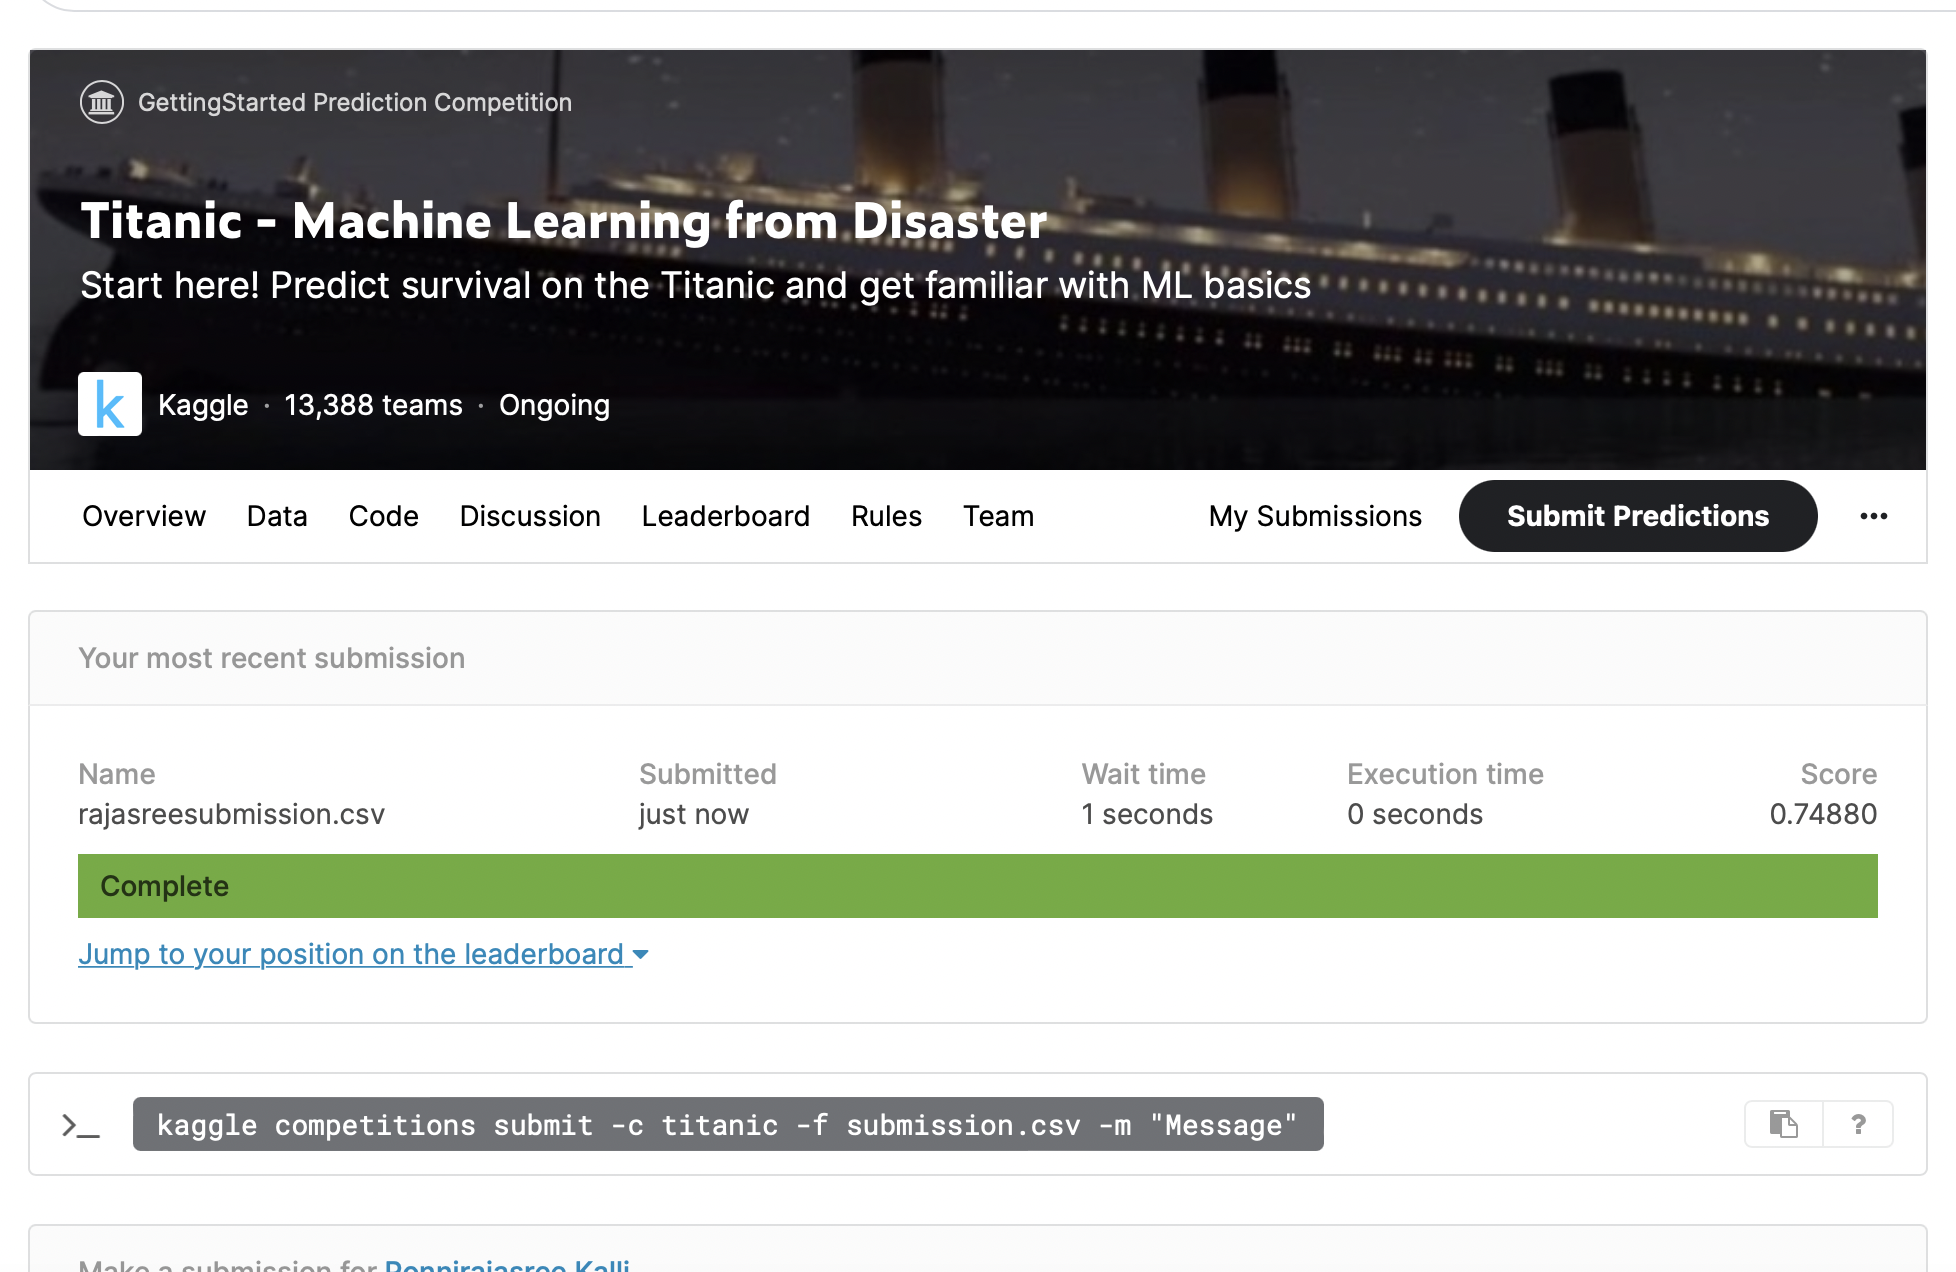